# 1. 추천 시스템이란
## 1.1 개요
넷플릭스, 쿠팡, 웹툰, 유튜브 등의 서비스는 상당히 많은 아이템들로 구성되어 있다.

사용자가 원하는 아이템을 어떻게 소비할까?
1. 검색 : 사용자가 의도를 가지고 검색을 해서 가져온다(Pull 방식). 연관성이 높은 것만 가져옴.
2. 추천 : 의도를 가진 키워드를 명목적으로 제공하지 않더라도 상품을 유저에게 노출한다(Push 방식). 사용자도 모르는 본인의 취향에 맞는 아이템을 추천.

**추천 시스템의 필요성**

과거에는 유저가 접할 수 있는 상품, 컨텐츠가 제한적이었다.
- TV, 영화관, 백화점, 신문 등


웹/모바일 환경은 다양한 상품, 컨텐츠를 등장하게 했다.
- 정보의 부족에서 풍요로
- Few Popular Items 에서 Long Tail Phenomenon

정보를 찾는데 시간이 오래 걸린다.
- 유저가 원하는 것을 어떤 키워드로 찾아야 하는지 모를 수 있다.

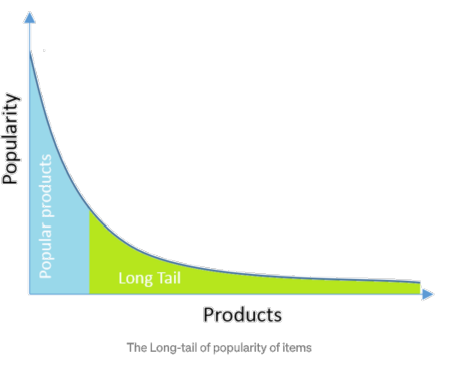
추천시스템이 풀고있는 문제의 본질 가운데 하나가 Long Tail 추천이다.

**Long-Tail Recommendation 사례**

1. 유튜브 동영상 추천
- 조회수가 급상승한 영상
- 해당 영상과 관련이 있음.
- 해당 영상이 업로드 되어 있는 채널의 영상을 조회수가 적더라고 추천한다.
    
2. SNS 친구 추천
- 수천만 혹은 수십억 명의 유저들 가운데 내가 알만한 사람들을 추천한다.

## 1.2 사용 데이터
**추천 시스템에서 사용하는 정보**
1. 유저 관련 정보
2. 아이템 관련 정보
3. 유저-아이템 상호작용 정보 => 유저와 아이템의 상호작용을 통해 생성된다.

**1. 유저 관련 정보**
- 유저 프로파일링
    - 추천 대상 유저에 관련된 정보를 구축하여, 개별 유저 혹은 유저 그룹별로 추천한다.
   
   
- 식별자(Identifier)
    - 유저 ID : 서비스에서 발급하는 가장 일반적인 정보
    - 디바이스 ID : 광고 추천에 사용한다.
    - 브라우저 쿠키 : 회원가입, 로그인하지 않고 사용하는 서비스일 때 사용한다.
    
    
- 데모그래픽 정보
    - 성별, 연령, 지역, 관심사 등을 직접 추정하여 수집한다.
    
    
- 유저 행동 정보
    - 페이지 방문 기록, 아이템 평가, 구매 등의 피드백을 기록한다.

**2. 아이템 관련 정보**
- 추천 아이템의 종류
    - 포탈 : 뉴스, 블로그, 웹툰 등 컨텐츠 추천
    - 광고/커머스 : 광고 소재, 상품 추천
    - 미디어 : 영화, 음악, 동영상 추천
    
    
- 아이템 프로파일링
    - 아이템 ID(제일 중요하다!)
    - 아이템의 고유 정보(Meta Data)
        - 영화 : 영화 장르, 출연 배우 및 감독, 영화 소개글, 개봉년도
        - 상품 : 상품 카테고리, 브랜드, 출시일 ,상품 이미지
        - 음악 : 아티스트, 작곡가, 장르, 음악 신호 그 자체

**3. 유저-아이템 상호작용 정보**
- 유저와 아이템의 상호작용 데이터
    - 유저가 오프라인 혹은 온라인에서 아이템과 상호작용 할 때 로그로 남는다.
    - 추천 시스템을 학습하는 데이터의 Feedback이 된다.


- *Explicit Feedback*
    - 유저에게 아이템에 대한 만족도를 직접 물어본 것이다.
    - ex) 유저의 영화에 대한 1 ~ 5점 사이의 평점
    

- *Implicit Feedback* (Explicit 보다 데이터가 압도적으로 많다)
    - 유저가 아이템을 클릭하거나 구매한 경우(간접적).
    - ex) 쿠팡에서 유저가 상품을 구매했으면 implicit feedback = Y

## 1.3 문제 정의
**추천 시스템의 목적**
1. 특정 유저에게 적합한 아이템을 추천한다. / 특정 아이템에게 적합한 유저를 추천한다.
2. 유저-아이템 상호 작용을 평가할 score값이 필요하다.
3. *추천을 위한 **score**는 어떻게 구해지고 사용될까?*

**추천 문제 : 랭킹 또는 예측**
- 랭킹(Ranking) : 유저에게 적합한 아이템 Top K개를 추천하는 문제이다.
    - Top K개를 선정하기 위한 기준이나 score가 필요하지만 유저(X)가 아이템(Y)에 가지는 정확한 선호도를 구할 필요는 없다.
    - 평가 지표 : Precision@K, Recall@K, Map@K, nDCG@K
    
    
- 예측(Prediction) : 유저가 아이템을 가질 선호도를 정확하게 예측(평점 or 클릭/구매 확률)
    - Explicit Feedback : 철수가 아이언맨에 대해 내릴 평점 값을 예측한다.
    - Implicit Feedback : 영희가 아이폼12를 조회하거나 구매할 확률 값을 예측한다.
    - 평가 지표 : MAE, RMSE, AUC

## 1.4 적용 사례
- 넷플릭스(Netflix)
    - Netflix 인기 콘텐츠
    - 지금 뜨는 콘텐츠
    - ㅇㅇㅇ님이 시청 중인 콘텐츠
  
  
- 쿠팡
    - 오늘의 쇼핑 제안
    - 다른 고객이 함께 구매한 상품
    
    
- Google Ads
    - 추천의 큰 도메인 중 하나.
    - 광고 추천을 잘 하는 것이 곧 돈이 된다.
    - 사용자에게 어떤 광고를 내보내야 할지 정하는 것도 추천 시스템이다.

# 2. 추천 시스템의 평가 지표
## 2.1 개요
**새로 적용한 추천 시스템 혹은 추천 모델의 성능 평가는 어떻게 해야할까?**
- 비즈니스/서비스 관점
    - 추천 시스템 적용으로 인해 매출, PV(Page View, 사용자 방문)의 증가
    - 추천 아이템으로 인해 유저의 CTR(Click Through Rate, 노출 대비 클릭률)의 증가
    
    
- 품질 관점
    - 연관성(Relevance) : 추천된 아이템이 유저와 관련이 있는가?(40대 남자에게 화장품 추천?, 골프 용품 추천?)
    - 다양성(Diversity) : 추천된 Top-K 아이템에 얼마나 다양한 아이템이 추천되는가?(오직 노트북 제품만 추천?)
    - 새로움(Novelty) : 얼마나 새로운 아이템이 추천되고 있는가?(Refresh 해도 똑같은 아이템만 추천 되는가?)
    - 참신함(Serendipity) : 유저가 기대하지 못한 뜻밖의 아이템이 추천되는가?

## 2.2 Offline Test
**Offline Test란**
- 새로운 추천 모델을 검증하기 위해 가장 우선적으로 수행되는 단계이다.
     - 유저로부터 수집한 데이터를 train/valid/test로 나누어 모델의 성능을 객관적인 지표로 평가한다.
     - 보통 offline test에서 좋은 성능을 보여야 online 서빙에 투입되지만, 실제 서비스 상황에서는 다양한 양상을 보인다.(serving bias 존재)
     
     
- 성능 지표
    - 랭킹 문제 : Precision@K, Recall@K, MAP@K, NDCG@K, Hit Rate
    - 예측 문제 : RMSE, MAE   

**Precision/Recall @K**
- Precision@K
    - 우리가 추천한 K개 아이템 가운데 실제 유저가 관심있는 아이템의 비율.
    
    
- Recall@K
    - 유저가 관심있는 전체 아이템 가운데 우리가 추천한 아이템의 비율
    
    
- 예시
    - 우리가 추천한 아이탬 개수 : 5(=K)
    - 추천한 아이템 중 유저가 관심있는 아이템 개수 : 2
    - 유저가 관심있는 아이템 전체 개수 : 3
    - => Precision@5 = 2/5
    - => Recall@5 = 2/3

**Mean Average Precision(MAP) @K**
- AP@K
    - Precision@1 부터 Precision@K 까지의 평균값
    - Precision@K와 달리, 관련 아이템을 더 높은 순위에 추천할수록 점수가 상승한다.
    - $AP@K$ = $\frac{1}{m}\sum_{i=1}^{|U|}Precision@i$


- MAP@K
    -모든 유저에 대한 Average Precision값의 평균
    - $MAP@K$ = $\frac{1}{|U|}\sum_{u=1}^{|U|}(AP@K)_{u}$

**Normalized Discounted Cumulative Gain(NDCG)**
- 추천 시스템에 가장 많이 사용되는 지표 중 하나, 원래는 검색(Information Retrieval)에서 등장한 지표이다.


- Precision@K, MAP@K와 마찬가지로 Top K 리스트를 만들고 유저가 선호하는 아이템을 비교하여 값을 구한다.


- MAP@K와 마찬가지로 추천의 순서에 가중치를 더 많이 두어 성능을 평가하여 1에 가까울수록 좋다.


- MAP와 달리, 연관성을 이진(binary)값이 아닌 수치로도 사용할 수 있기 때문에 유저에게 얼마나 더 관련있는 아이템을 상위로 노출시키는지 알 수 있다.

**NDCG Formula**
- Cumulative Gain
    - 상위 K개 아이템에 대하여 관련도를 합한 것. 순서에 따라 Discount하지 않고 더한 값
    - $CG_K = \sum_{i=1}^{K}rel_{i}$
    
    
- Discounted Cumulative Gain
    - 순서에 따라 Cumulative Gain을 Discount함
    - $DCG_{k} = \sum_{i=1}^{K}\frac{rel_{i}}{\log_{2}(i+1)}$
    
    
- Ideal DCG
    - 이상적인 추천이 일어났을 때의 DCG값. 가능항 DCG값 중에 제일 크다
    - $IDCG = \sum_{i=1}^{K}\frac{rel_{i}^{opt}}{\log_{2}(i+1)}$
    
    
- Normalized DCG
    - 추천 결과에 따라 구해진 DCG를 IDCG로 나눈 값
    - $NDCG = \frac{DCG}{IDCG}$
    
**NDCG 예시**
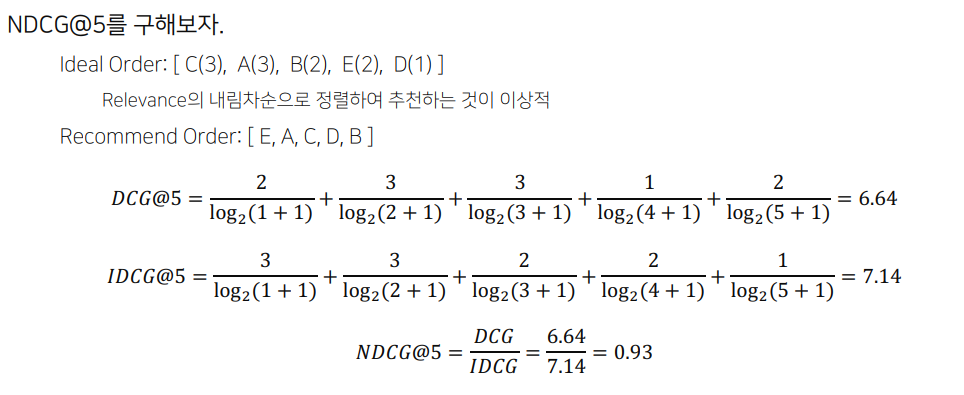

## 2.3 Online Test
**Online A/B Test란**
- Offline Test에서 검증된 가설이나 모델을 이용해 실제 추천 결과를 서빙하는 단계
    - 추천 시스템 변경 전후의 성능을 비교한는 것이 아니라, 동시에 대조군(A)과 실험군(B)의 성능을 평가한다.(대조군과 실험군의 환경은 최대한 동일해야 한다.)
    - 실제 서비스를 통해 얻어지는 결과를 통해 최종 의사결정이 어루어진다.

# 3. 인기도 기반 추천
## 3.1 개요
**인기도 기반 추천이란**

머신러닝이 아닌 통계적으로 모든 사용자에게 좋은 피드백을 받은 아이템을 추천. 서비스 런칭 초반에 많이 사용한다.
- 말 그대로 가장 인기있는 아이템을 추천
    - *가장 '인기있다'의 정의는 뭘까?*
    
    
- 인기도의 척도
    - 조회수, 평균 평점, 리뷰 개수, 좋아요/싫어요 수
    
    
- 예시
    - 네이버 쇼핑 랭킹 순(적합도, 인기도, 신뢰도)
    - 다음 뉴스, 댓글 추천
    - 레딧 Hot 추천

**어떻게 스코어를 만들어야 할까?**

1. 조회수가 가장 많은 아이템을 추천 (Most Popular)
    - 뉴스 추천. 유저들은 다른 유저들도 많은 관심을 가지고 있는 핫햔 이슈를 보고싶어 한다.
    
    
2. 평균 평점이 가장 높은 아이템을 추천 (Highly Rated)
    - 맛집 추천. 평점이 높은 맛집일수록 맛있는 음식을 제공하는 레스토랑으로 기대됨.

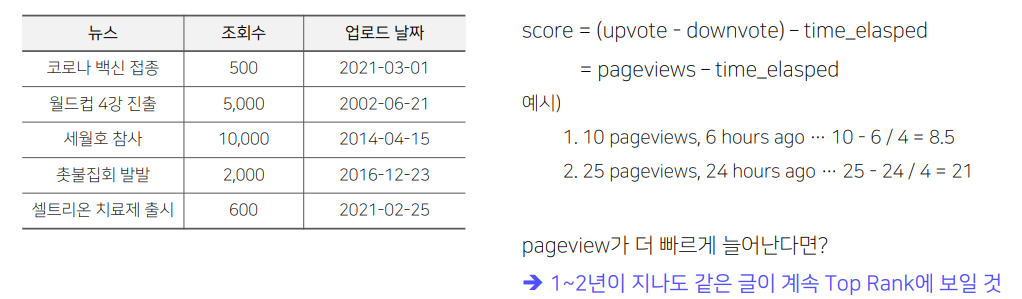

## 3.2 Most Popluar
**Score Formula**

가장 많이 조회된 뉴스를 추천 or 좋아요가 가장 많은 게시글을 추천
- 뉴스의 가장 중요한 속성은 최신성이다.


**Hacker News Formula**
뉴스를 추천해주는 서비스
- $score = \frac{pageviews - 1}{(age + 2)^{gravity}}$


- 시간이 지날수록 age가 점점 증가하므로 score는 작아진다.


- 시간에 따라 줄어드는 score를 조정하기 위해 gravity라는 상수를 사용한다.(gravity = 1.8)


- 많은 시간이 지났을 때는 아무리 많은 pageview를 가진 뉴스일지라도 점점 값은 0으로 가까워진다.

**Reddit Formula**
- $score = \log_{10}(ups - downs) + \frac{sign(ups - downs)\cdot seconds}{45000}$


- 첫 번째 term은 popularity, 두 번째 term은 글이 포스팅이 게시된 절대 시간
    - 나중에 게시된 포스팅일수록 절대시간 값이 크기 때문에 더 높은 score를 가진다.
    
    
- 첫 번째 vote에 대해서 가장 높은 가치를 부여하며, votre가 늘어날 수록 score의 증가 폭이 작아진다.
    - 오래된 포스팅일수록 상대적으로 아주 많은 vote가 있어야 높은 score를 가진다.

## 3.3 Highly Rated
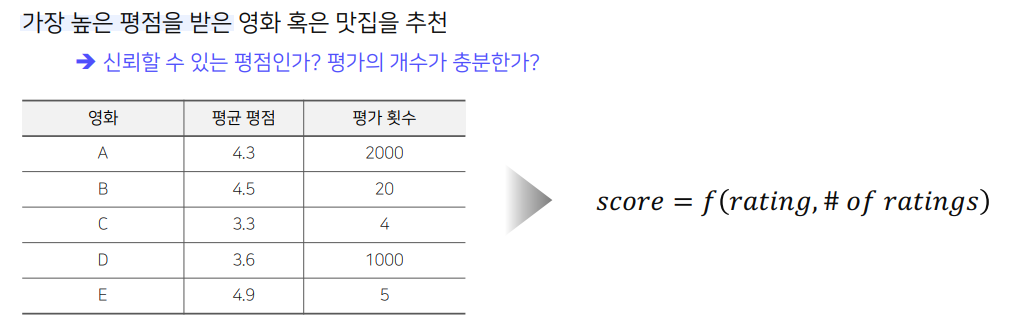

**Steam Rating Formula**
- $avg\_rating = \frac{\#\ of\ positive\ reviews}{\#\ of\ reviews}$


- $score = avg\_rating - (avg\_rating - 0.5)\cdot 2^{-\log(\#\ of\ reviews)}$


- rating은 평균값을 사용하되, 전체 review 개수에 따라 rating을 보정한다.
    - review의 개수가 너무 적을 경우 0.5보다 socre가 낮을(높을) 경우 조금 높게(낮게) 보정
    

- review의 개수가 아주 많을 경우 score는 평균 rating과 거의 유사해짐

**Steam Rating Formula -> Movie Rating**
- $avg\_rating = \frac{sum(rating)}{\#\ of\ reviews}$


- $score = avg\_rating - (avg\_rating - 3.0)\cdot 2^{-\log(\#\ of\ reviews)}$


- 영화 평점은 positive, negative가 아닌 1.0부터 5.0의 rating을 사용한다.
    - 0.5 대신 영화 평점 1.0 ~ 5.0 사이의 중앙값인 3.0을 사용한다.
    - 3.0 대신 모든 평점 데이터의 평균 값을 사용해도 된다.
    
    
- 마찬가지로 전체 review 개수가 많아질수록 score는 평균 rating에 가까워진다.